# Open exploration
Exploring 1000 scenarios over the whole uncertainty space with lhs. 60 replications are used. This notebook includes the following:

- Fitting a linear regression model
- Feature scoring using the extra trees algorithm
- Visual analysis using plotting
- Scenario discovery using PRIM

In [2]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# load orginal data
experiments_original, results = load_results('../data/output/EMA/resultsOpenExploration.tar.gz')

In [4]:
# convert groupforming column in experiments to readable format
# e.g. [0.5, 0.38, 0.075, 0.03, 0.015] translates to 50% groupForming
groups = {str([[round(0.5 - num/100, 2), round(0.38 + num/100, 2), 0.075, 0.03, 0.015] for i in range(4)]):(50 + num) for num in range(0, 36)}
experiments = experiments_original.copy()
experiments = experiments.astype({'groupForming': str})
experiments = experiments.replace({'groupForming': groups})

In [5]:
experiments.head()

,groupForming,meanFreeFlowSpeed,obstPotentialHeight,pedPotentialHeight,sdFreeFlowSpeed,spawnFrequencyA,spawnFrequencyB,spawnFrequencyC,spawnFrequencyD,scenario,policy,model
0,76,1.060674,6.690549,33.048202,0.199767,3.0,3.0,1.0,1.0,0,None,model
1,75,0.665005,7.780837,33.879487,0.299107,4.0,4.0,4.0,4.0,1,None,model
2,55,1.103990,8.975341,9.524160,0.206984,1.0,4.0,2.0,3.0,2,None,model
3,64,0.815386,6.564230,36.961294,0.277819,5.0,1.0,4.0,1.0,3,None,model
4,83,0.899833,6.189249,26.041421,0.207393,4.0,5.0,3.0,2.0,4,None,model


In [6]:
experiments.describe()

,groupForming,meanFreeFlowSpeed,obstPotentialHeight,pedPotentialHeight,sdFreeFlowSpeed,spawnFrequencyA,spawnFrequencyB,spawnFrequencyC,spawnFrequencyD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.500000,0.910005,6.000051,27.499978,0.225000,3.000000,3.000000,3.000000,3.000000
std,10.393846,0.144414,2.310575,12.996852,0.043324,1.414921,1.414921,1.414921,1.414921
min,50.000000,0.660253,2.002553,5.022257,0.150117,1.000000,1.000000,1.000000,1.000000
25%,58.750000,0.784937,4.001277,16.253343,0.187554,2.000000,2.000000,2.000000,2.000000
50%,67.500000,0.910025,5.997280,27.495697,0.224981,3.000000,3.000000,3.000000,3.000000
75%,76.250000,1.035021,8.000187,38.747880,0.262487,4.000000,4.000000,4.000000,4.000000
max,85.000000,1.159944,9.995529,49.971420,0.299901,5.000000,5.000000,5.000000,5.000000


In [7]:
results_df = pd.DataFrame(results)
results_df.head()

,meanSpeed,meanDensityArea1,maxDensityArea1,meanDensityArea2,maxDensityArea2,meanDensityArea3,maxDensityArea3,meanDensityArea4,maxDensityArea4
0,0.760026,0.069283,0.209127,0.047409,0.149106,0.604595,1.593928,0.311546,0.852392
1,0.549728,0.035605,0.140895,0.011323,0.048611,0.058351,0.127113,0.052188,0.143382
2,0.810329,0.099829,0.287107,0.032036,0.105636,0.189492,0.389372,0.238746,0.616582
3,0.632068,0.346757,0.705952,0.038816,0.147236,0.194076,0.581332,0.199129,0.645021
4,0.662452,0.026394,0.113425,0.014733,0.058801,0.155957,0.338584,0.141837,0.375242


In [8]:
results_df.describe()

,meanSpeed,meanDensityArea1,maxDensityArea1,meanDensityArea2,maxDensityArea2,meanDensityArea3,maxDensityArea3,meanDensityArea4,maxDensityArea4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.696379,0.127197,0.322280,0.029949,0.107176,0.184132,0.442937,0.159841,0.450659
std,0.100628,0.119373,0.221447,0.014419,0.043287,0.127619,0.331385,0.100879,0.295181
min,0.498800,0.020113,0.093044,0.006822,0.033467,0.031920,0.067717,0.031692,0.084528
25%,0.616218,0.043434,0.159208,0.018344,0.071515,0.079524,0.169436,0.074236,0.197002
50%,0.686898,0.084043,0.262886,0.028027,0.102878,0.153451,0.326820,0.131427,0.359047
75%,0.770480,0.135631,0.369148,0.039386,0.138379,0.255051,0.662104,0.230496,0.673362
max,0.966588,0.548200,1.235563,0.083208,0.266147,0.661683,1.593928,0.592234,1.524272


In [9]:
# drop unneeded columns from experiments for the analysis
X = experiments.drop(['model','policy', 'scenario'], inplace=False, axis=1)

## Visual analysis

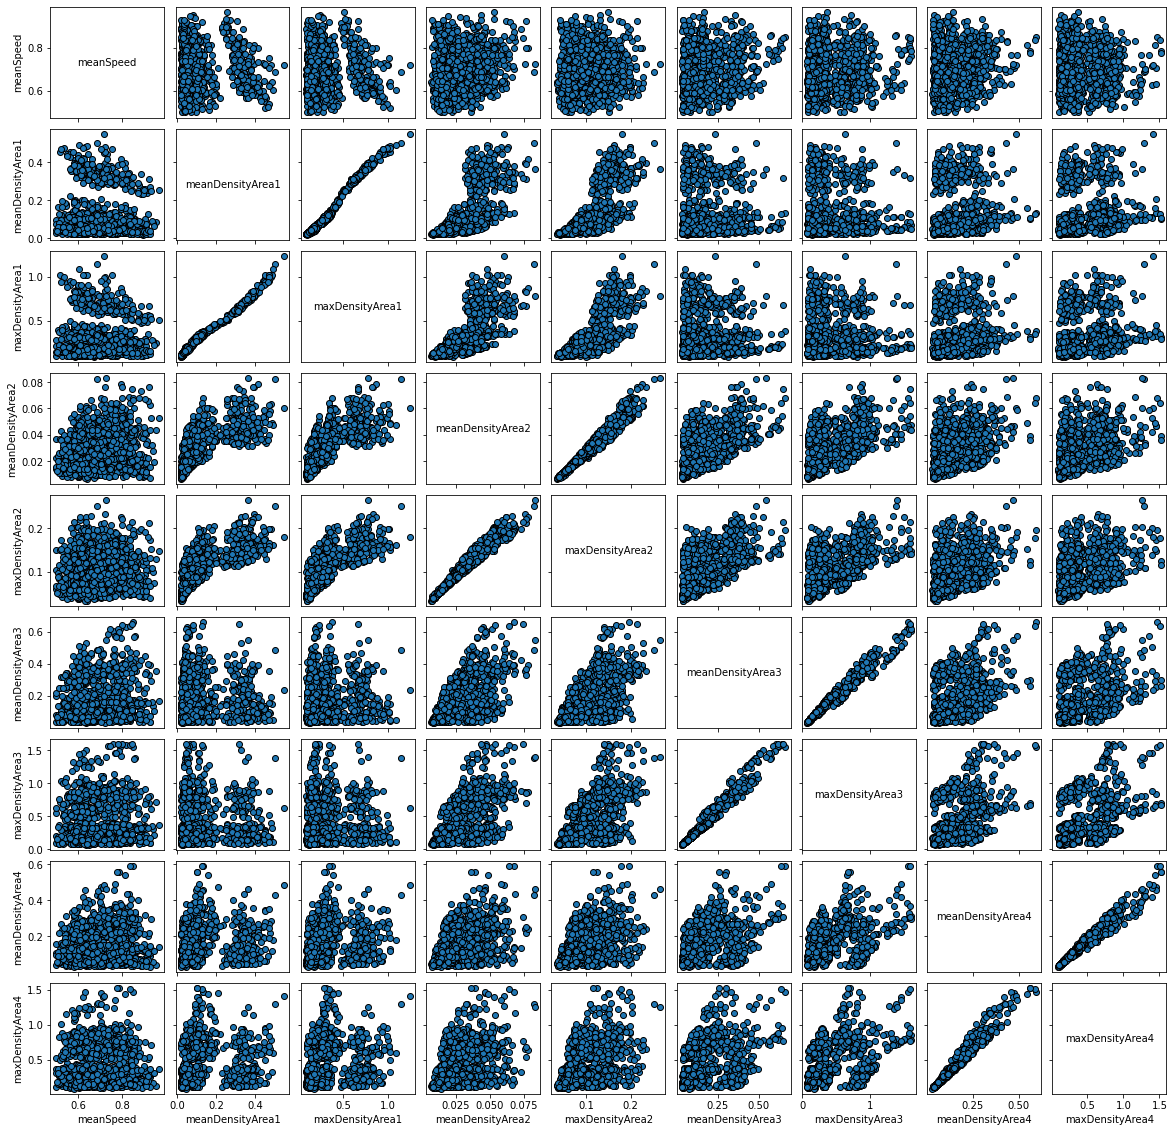

In [10]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(
    experiments,
    results,
)

fig.set_size_inches(20, 20)
plt.show()

## Linear regression model

In [11]:
import statsmodels.api as sm

# add constant
X_0 = sm.add_constant(X)

In [12]:
# specify outcome to fit linear regression on
outcome = 'meanDensityArea3'

In [13]:
est = sm.OLS(results_df[outcome], X_0.astype(float)).fit()
print(est.summary())
print(est.params)

                            OLS Regression Results                            
Dep. Variable:       meanDensityArea3   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     404.9
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:16:04   Log-Likelihood:                 1412.0
No. Observations:                1000   AIC:                            -2804.
Df Residuals:                     990   BIC:                            -2755.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3867    

## Feature scoring

In [14]:
from ema_workbench.analysis import feature_scoring

# use the extra trees algorithm
fs = feature_scoring.get_feature_scores_all(
    x=X,
    y=results,
    alg='extra trees',
)

/home/geodan-florisb/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/geodan-florisb/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/geodan-florisb/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.1-py3.10.egg/ema_workbench/analysis/feature_scoring.py:389: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  complete = complete.append(fs.T, sort=True)
/home/geodan-florisb/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated 

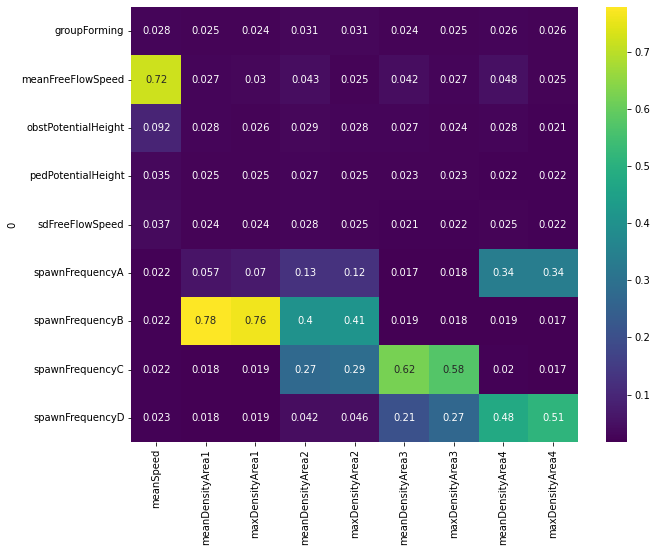

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(fs,
            cmap="viridis",
            annot=True,
            ax=ax)
plt.show()

## PRIM

In [22]:
x = experiments
y = (
    (results['meanSpeed'] < np.percentile(results['meanSpeed'], 25)) | 
    (results['meanDensityArea1'] > np.percentile(results['meanDensityArea1'], 75)) |
    (results['maxDensityArea1'] > 0.99) | 
    (results['meanDensityArea2'] > np.percentile(results['meanDensityArea2'], 75)) |
    (results['maxDensityArea2'] > 0.99) |
    (results['meanDensityArea3'] > np.percentile(results['meanDensityArea3'], 75)) |
    (results['maxDensityArea3'] > 0.99) |
    (results['meanDensityArea4'] > np.percentile(results['meanDensityArea4'], 75)) |
    (results['maxDensityArea4'] > 0.99)
)
prim_alg = prim.Prim(x, y, threshold=0.8)
box = prim_alg.find_box()

In [23]:
sum(y)

666

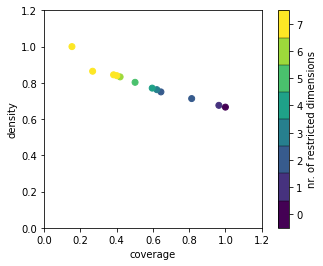

In [24]:
box.show_tradeoff()
plt.show()

In [25]:
chosen_point = 4

coverage    0.621622
density     0.762431
id                 4
mass           0.543
mean        0.762431
res_dim            3
Name: 4, dtype: object

                        box 4                                          
                          min       max                       qp values
spawnFrequencyD      1.000000  3.500000  [-1.0, 2.7968532758096083e-05]
meanFreeFlowSpeed    0.660253  1.132404      [-1.0, 0.2695247167850311]
obstPotentialHeight  2.400764  9.995529     [0.27735848319873846, -1.0]



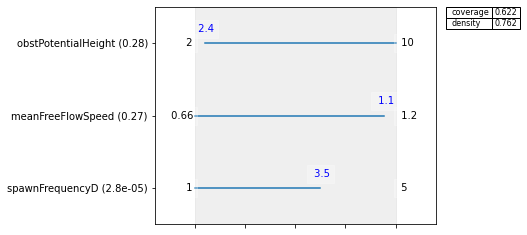

In [26]:
box.inspect(chosen_point)
box.inspect(chosen_point, style="graph")
plt.show()

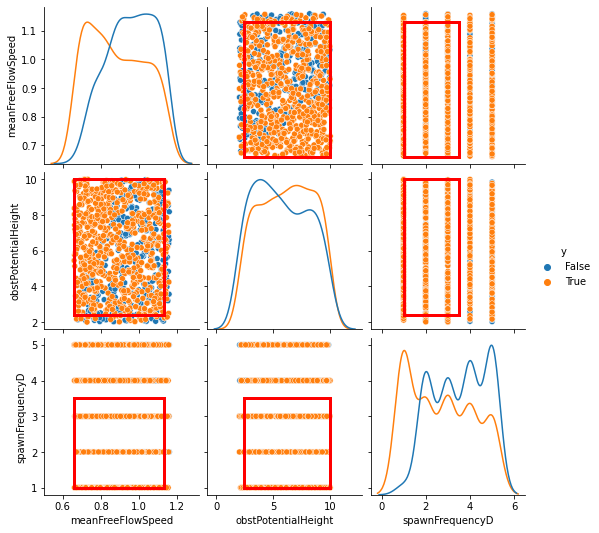

In [27]:
box.show_pairs_scatter(chosen_point)
plt.show()